In [32]:
import pandas as pd
import tables as tb
import glob
import numpy as np
from invisible_cities.io.dst_io import load_dst
import matplotlib.pyplot as plt

In [33]:
path = '/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/228Th/refactor_prod/prod/{city}/*'

In [34]:
# NUMBER OF SIMULATED EVENTS
nevent_per_file = 20000
nfiles_per_port = 200
nevents_per_port = nevent_per_file * nfiles_per_port
nport = 1
nevents = nevents_per_port * nport

In [35]:
def get_mc_info(f, active = True):
    hit_df = load_dst(f, 'MC', 'hits')
    conf_df = load_dst(f, 'MC', 'configuration')
    if active: hit_df = hit_df[hit_df.label == 'ACTIVE']
    hit_df = hit_df.merge(hit_df.groupby('event_id').energy.sum().rename('tot_ene'), on='event_id')
    hit_df = hit_df.merge(hit_df.groupby('event_id').size().rename('nhits'), on='event_id')
    hit_df_ = hit_df[['event_id', 'tot_ene', 'nhits']].drop_duplicates()

    hit_df_['port'] = conf_df[conf_df.param_key == '/Generator/IonGenerator/region'].param_value.values[0].replace(' ', '')
    # hit_df_['sim_evs'] = int(conf_df[conf_df.param_key == 'num_events'].param_value.values[0])
    # hit_df_['sav_evs'] = int(conf_df[conf_df.param_key == 'saved_events'].param_value.values[0])
    # hit_df_['file_id'] = int(f.split('/')[-1].split('_')[1])
    return hit_df_

In [28]:
info_df_228Th = pd.DataFrame()
for f in sorted(glob.glob(path.format(city='nexus')), key = lambda x: (x.split('/')[-3], int(x.split('_')[-2]))):
    info_df_228Th = info_df_228Th.append(get_mc_info(f))

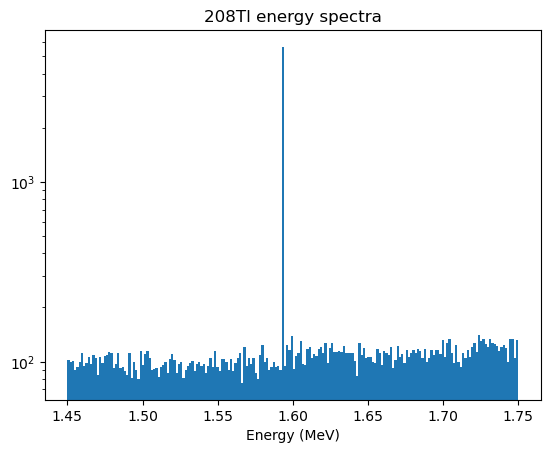

In [31]:
plt.hist(info_df_228Th.tot_ene, 200)
plt.title('208Tl energy spectra')
plt.xlabel('Energy (MeV)')
plt.yscale('log')
plt.show()

In [25]:
cosa_['sim_evs'] = 13

In [27]:
pd.DataFrame(columns = ['sim_evs', 'sav_evs'])

,sim_evs,sav_evs


In [23]:
cosa

""


In [9]:
info_df_228Th

,event_id,tot_ene,nhits,port
0,0,1.697479,263,PORT_1a
263,1,1.592507,259,PORT_1a
522,2,1.642702,291,PORT_1a
813,3,1.467953,268,PORT_1a
1081,4,1.680183,296,PORT_1a
...,...,...,...,...
31439,3980118,1.540285,328,PORT_1a
31767,3980119,1.592507,293,PORT_1a
32060,3980120,1.592507,278,PORT_1a
32338,3980121,1.605938,346,PORT_1a
